In [ ]:
"""
Purpose: To check the errors on the validation test set
to get ideas on how to make validation score go up

"""

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from os import sys
sys.path.append("/meshAfterParty/")
sys.path.append("/meshAfterParty/meshAfterParty/")

In [3]:
from pathlib import Path
import numpy as np
import neuron_visualizations as nviz
import datajoint as dj

import proofreading_utils as pru
import classification_utils as clu

import neuron_utils as nru
import validation_utils as vu
import pandas as pd
import datajoint_utils as du

INFO - 2021-04-07 03:05:09,721 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-04-07 03:05:09,724 - settings - Setting database.user to celiib
INFO - 2021-04-07 03:05:09,725 - settings - Setting database.password to newceliipass
INFO - 2021-04-07 03:05:09,754 - settings - Setting stores to {'minnie65': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65', 'stage': '/mnt/dj-stor01/platinum/minnie65'}, 'meshes': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/meshes', 'stage': '/mnt/dj-stor01/platinum/minnie65/02/meshes'}, 'decimated_meshes': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/decimated_meshes', 'stage': '/mnt/dj-stor01/platinum/minnie65/02/decimated_meshes'}, 'skeletons': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/skeletons'}}
INFO - 2021-04-07 03:05:09,756 - settings - Setting enable_python_native_blobs to True
INFO - 2021-04-07 03:05:09,771 - connection - Connect

Connecting celiib@at-database.ad.bcm.edu:3306


INFO - 2021-04-07 03:05:10,186 - settings - Setting enable_python_native_blobs to True
INFO - 2021-04-07 03:05:10,191 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-04-07 03:05:10,192 - settings - Setting database.user to celiib
INFO - 2021-04-07 03:05:10,193 - settings - Setting database.password to newceliipass
INFO - 2021-04-07 03:05:10,194 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-04-07 03:05:10,195 - settings - Setting database.user to celiib
INFO - 2021-04-07 03:05:10,195 - settings - Setting database.password to newceliipass
INFO - 2021-04-07 03:05:10,198 - settings - Setting enable_python_native_blobs to True
INFO - 2021-04-07 03:05:10,638 - settings - Setting enable_python_native_blobs to True


# Computing the validation statistics (to pick the ones to look at)

In [4]:
segment_ids = du.proofreading_stats_table(validation=True).fetch("segment_id")

validation_dfs = [vu.synapse_validation_df_single_neuron(k,
                                        remove_presyn_on_dendrite = False,
                        count_presyn_on_dendrite_as_correct = True,
                                                        include_extension_synapse=False) for k in segment_ids]

Synapsse Results:
Total Number of Synapses = 3990
n_valid_syn_ids_presyn = 5
n_errored_syn_ids_presyn = 29
n_valid_syn_ids_postsyn = 3891
n_errored_syn_ids_postsyn = 65
Synapsse Results:
Total Number of Synapses = 4434
n_valid_syn_ids_presyn = 39
n_errored_syn_ids_presyn = 482
n_valid_syn_ids_postsyn = 3898
n_errored_syn_ids_postsyn = 15
Synapsse Results:
Total Number of Synapses = 923
n_valid_syn_ids_presyn = 13
n_errored_syn_ids_presyn = 153
n_valid_syn_ids_postsyn = 753
n_errored_syn_ids_postsyn = 4
Synapsse Results:
Total Number of Synapses = 4361
n_valid_syn_ids_presyn = 86
n_errored_syn_ids_presyn = 621
n_valid_syn_ids_postsyn = 3649
n_errored_syn_ids_postsyn = 5
Synapsse Results:
Total Number of Synapses = 3452
n_valid_syn_ids_presyn = 76
n_errored_syn_ids_presyn = 345
n_valid_syn_ids_postsyn = 3007
n_errored_syn_ids_postsyn = 24
Synapsse Results:
Total Number of Synapses = 3190
n_valid_syn_ids_presyn = 18
n_errored_syn_ids_presyn = 89
n_valid_syn_ids_postsyn = 3081
n_errored_sy

Synapsse Results:
Total Number of Synapses = 1645
n_valid_syn_ids_presyn = 0
n_errored_syn_ids_presyn = 108
n_valid_syn_ids_postsyn = 1536
n_errored_syn_ids_postsyn = 1
Synapsse Results:
Total Number of Synapses = 4633
n_valid_syn_ids_presyn = 72
n_errored_syn_ids_presyn = 219
n_valid_syn_ids_postsyn = 4328
n_errored_syn_ids_postsyn = 14
Synapsse Results:
Total Number of Synapses = 2383
n_valid_syn_ids_presyn = 0
n_errored_syn_ids_presyn = 47
n_valid_syn_ids_postsyn = 2334
n_errored_syn_ids_postsyn = 2
Synapsse Results:
Total Number of Synapses = 4015
n_valid_syn_ids_presyn = 12
n_errored_syn_ids_presyn = 109
n_valid_syn_ids_postsyn = 3879
n_errored_syn_ids_postsyn = 15
Synapsse Results:
Total Number of Synapses = 1914
n_valid_syn_ids_presyn = 3
n_errored_syn_ids_presyn = 212
n_valid_syn_ids_postsyn = 1528
n_errored_syn_ids_postsyn = 171
Synapsse Results:
Total Number of Synapses = 10012
n_valid_syn_ids_presyn = 8
n_errored_syn_ids_presyn = 164
n_valid_syn_ids_postsyn = 9825
n_errored_

Segment_id = 864691136333790899


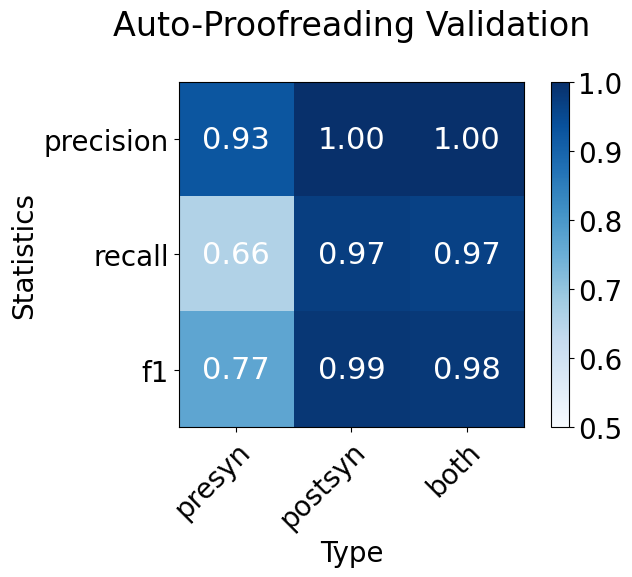

In [47]:
curr_idx = 19
#curr_idx = 20
segment_id = segment_ids[curr_idx]
proofread_segment_id = segment_id
print(f"Segment_id = {segment_id}")
curr_validation_df = validation_dfs[curr_idx]
vu.synapse_validation_df_to_score_plot(curr_validation_df)

# Picking the neuron to visualize

In [50]:
du.plot_proofread_validation_neuron(
    segment_id = segment_id,
    validation_df=curr_validation_df,
    verbose = True,
    synapse_type = "presyn",
    synapse_scatter_size = 0.15,
)

Working on Neuron: 864691136333790899


Synapse Category Results, synapse_type = presyn
# of TP = 50
# of TN = 135
# of FP = 4
# of FN = 26
No axon skeleton attribute stored in database table


TP:yellow
TN:aqua
FP:black
FN:orange


# Checking the neuron proofreading

In [11]:
segment_id = vu.validation_df_to_old_segment_id(curr_validation_df)
print(f"segment_id = {segment_id}, fom proofread_segment_id = {proofread_segment_id}")

segment_id = 864691136008425132, fom proofread_segment_id = 864691136008425132


In [12]:
neuron_objs,neuron_split_idxs = du.decomposition_with_spine_recalculation(segment_id)

Decompressing Neuron in minimal output mode...please wait
Pulled from Table Decomposition so setting split_index = 0
Dont need spine recalculation
Number of Neurons found = 1


In [13]:
neuron_obj = neuron_objs[0]
neuron_obj.segment_id

864691136008425132

In [14]:
clu.axon_classification(neuron_obj,
                       plot_axons=True)


Part 1: Axon like branchese 
{'L0': array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  20,  21,  22,  23,  24,  25,  26,  27,  28,
        29,  30,  31,  32,  33,  34,  35,  36,  38,  39,  40,  41,  42,
        43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,
        56,  57,  58,  60,  61,  62,  66,  67,  68,  69,  70,  71,  72,
        73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,  84,  85,
        87,  89,  90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100,
       101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113,
       114, 115, 116, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127]), 'L4': array([2, 3, 6, 9]), 'L6': array([3])}
Limb L0 soma angle: 142.3 
Limb L1 soma angle: 4.12 
Limb L2 soma angle: 108.55 
Limb L3 soma angle: 105.42 
Limb L4 soma angle: 107.92 
Limb L5 soma angle: 111.81 
Limb L6 soma angle: 100.1 
Limb L7 soma angle: 79.88 
Limb L8 soma angle: 49.47 

Part 2: possible_axon

base_final_widths = [263.95253492 251.3549738 ]
overall_ais_width = 214.63886168066438
ais_width = 257.6537543588536
Adding the following branches as true axons: [  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.
  14.  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.
  28.  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.
  42.  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.
  56.  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.
  70.  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.
  84.  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.
  98.  99. 100. 101. 102. 103. 104. 105. 106. 107. 108. 109. 110. 111.
 112. 113. 114. 115. 116. 117. 118. 119. 120. 121. 122. 123. 124. 125.
 126. 127.]
curr_soma_angle = 142.3
max_axon_angle = 149.36517831886925
Changing to a better axon candidate


 --- Working on limb 2, candidate # 0
0 out of 5 branches are axons
Axon percentage = 0.0

0 out of 1 branches are axons
Axon percentage = 0.0
Not adding candidate no axon branches detected 


 --- Working on limb 6, candidate # 1
1 out of 3 branches are axons
Axon percentage = 0.3333333333333333
curr_axon_angle_threshold = 120
candidate_nodes = [0 2 3 4]
non_axon_branches_on_subgraph = [0 2 4]
endnodes_to_test = []
candidate_angles,restr_skels = (None, None)
Not adding candidate because no angles (None) passed the threhold 120 


 --- Working on limb 7, candidate # 0
0 out of 3 branches are axons
Axon percentage = 0.0
Not adding candidate no axon branches detected 
Using the best axon approach
Using True
Limb L0: Axon branches before dendritic path filter = [  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.
  14.  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.
  28.  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.
  42.  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.
  56.  57.  58.  59.  60.  61.  62.  6

({'L0': array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
          11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
          22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
          33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
          44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
          55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,
          66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,
          77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,
          88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,
          99., 100., 101., 102., 103., 104., 105., 106., 107., 108., 109.,
         110., 111., 112., 113., 114., 115., 116., 117., 118., 119., 120.,
         121., 122., 123., 124., 125., 126., 127.])},
 {'L4': array([2, 3, 6, 9]), 'L6': array([3])})

In [15]:
nviz.plot_axon(neuron_obj,skeleton = True)


 Working on visualization type: mesh

 Working on visualization type: skeleton


# Filtering Dendrite on Axon then recomputing High Fidelity Axon

In [16]:
plot_limb_branch_filter_with_disconnect_effect = False
verbose = False
verbose_outline = True

pre_filters = pru.get_exc_filters_high_fidelity_axon_preprocessing()
o_neuron_pre, filtering_info_pre = pru.apply_proofreading_filters_to_neuron(input_neuron = neuron_obj,
                                        filter_list = pre_filters,
                    plot_limb_branch_filter_with_disconnect_effect=plot_limb_branch_filter_with_disconnect_effect,
                                        plot_limb_branch_filter_away=False,
                                        plot_final_neuron=False,

                                        return_error_info=True,
                                         verbose=verbose,
                                        verbose_outline=verbose_outline)


--- Working on filter 0:
function = dendrite_on_axon_merges
function __name__ = filter_away_dendrite_on_axon_merges
function arguments = {'use_pre_existing_axon_labels': True}





 ---- Total time for applying filter: 55.50736594200134 -----


In [17]:
# Getting the high fidelity axon
neuron_obj_high_fid_axon = pru.refine_axon_for_high_fidelity_skeleton(o_neuron_pre)

Starting axon branch was the starting node so using border vertices and NOT computing upstream branch
upstream_node_to_axon_starting_branch = None
More than 1 seperated mesh (taking the top one): [<trimesh.Trimesh(vertices.shape=(285670, 3), faces.shape=(570020, 3))>
 <trimesh.Trimesh(vertices.shape=(10995, 3), faces.shape=(21877, 3))>
 <trimesh.Trimesh(vertices.shape=(3713, 3), faces.shape=(7403, 3))>]
root_curr = [1280265.  683256.  767025.]
Time for preparing soma vertices and root: 0.0004885196685791016
invalidation_d = 2000
cc_vertex_thresh = 10


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/285669 [00:00<?, ?it/s]

100%|██████████| 1/1 [01:24<00:00, 84.26s/it]


meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 87.28988027572632
branches_touching_root = [13]
combining close nodes
combine_threshold = 1300
length of Graph = 52270
After combining close endpoints max(kept_branches_idx) = 526, len(kept_branches_idx) = 465
empty_indices % = 0.0
 conflict_indices % = 0.03176544608915262


  0%|          | 0/194 [00:00<?, ?it/s]

AFTER face_lookup_resolved_test


  0%|          | 0/465 [00:00<?, ?it/s]

Decomposing first pass: 103.63718605041504
Only Using MeshParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 0.0006847381591796875
Total time for MAP sublimb processing 1.1205673217773438e-05
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 7.319450378417969e-05
Fixing Possible Soma Extension Branch for Sublimb 0
Total time for mesh KDTree = 0.1822502613067627
sbv[0].reshape(-1,3) = [[1280265.  683256.  767025.]]
closest_sk_pt_coord BEFORE = [1280427.45746812  683631.77279812  767234.93773063]
current_skeleton.shape = (560, 2, 3)
node_for_stitch = 0: [1280427.45746812  683631.77279812  767234.93773063]
node_for_stitch AFTER = 0: [1280427.45746812  683631.77279812  767234.93773063]
possible_node_loc = [ 0 26]
possible_node_loc AFTER = [ 0 26]
curr_shortest_path = [0]
Current stitch point was a branch or endpoint
change_status for creat

  0%|          | 0/69 [00:00<?, ?it/s]

Removed 68 skeletal branches


  0%|          | 0/465 [00:00<?, ?it/s]

570019 570020
For marked faces: None
empty_indices % = 0.003005157713764429
 conflict_indices % = 0.0


  0%|          | 0/9 [00:00<?, ?it/s]

AFTER face_lookup_resolved_test


  0%|          | 0/339 [00:00<?, ?it/s]

Limb Correspondence before stitching = 339


0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (1, 2)
empty_indices % = 0.16521468574984444
 conflict_indices % = 0.003422526446795271


  0%|          | 0/14 [00:00<?, ?it/s]

AFTER face_lookup_resolved_test


  0%|          | 0/2 [00:00<?, ?it/s]

main_branch = 61


0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (1, 2)
empty_indices % = 0.28478917829903583
 conflict_indices % = 0.0


  0%|          | 0/24 [00:00<?, ?it/s]

AFTER face_lookup_resolved_test


  0%|          | 0/2 [00:00<?, ?it/s]

main_branch = 247
Limb Correspondence AFTER stitching = 340
Upstream node was None so don't have to adjust
concept_network_dict = {0: [<networkx_utils.GraphOrderedEdges object at 0x7f38774c2860>]}
Assigning the old width calculation because no valid new widths
Assigning the old width calculation because no valid new widths
Assigning the old width calculation because no valid new widths
Assigning the old width calculation because no valid new widths
Assigning the old width calculation because no valid new widths
Assigning the old width calculation because no valid new widths
Assigning the old width calculation because no valid new widths
Assigning the old width calculation because no valid new widths
Assigning the old width calculation because no valid new widths
Assigning the old width calculation because no valid new widths
Assigning the old width calculation because no valid new widths
Assigning the old width calculation because no valid new widths
Assigning the old width calculation

In [ ]:
nviz.plot_axon(neuron_obj_high_fid_axon)

# Computing the Boutons of the Axon

In [18]:
import axon_utils as au
neuron_obj_with_boutons = au.calculate_boutons(#parameters for run
neuron_obj = neuron_obj_high_fid_axon,
plot_axon_branches_to_check = False,
plot_boutons = False,
verbose = False,
)


  0%|          | 0/292 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/17 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/18 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/17 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/18 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/29 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/18 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/18 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/18 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/18 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/17 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/28 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/22 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/27 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/57 [00:00<?, ?it/s]

  0%|          | 0/18 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/17 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/18 [00:00<?, ?it/s]

  0%|          | 0/57 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/27 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/36 [00:00<?, ?it/s]

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/60 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/27 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/55 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/94 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/17 [00:00<?, ?it/s]

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/36 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/81 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/62 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/26 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

# Computing the Webbing

In [19]:
neuron_obj_with_web = au.calculate_axon_webbing(neuron_obj_with_boutons,
                      idx_to_plot = [0],
                plot_intersection_mesh = True,
                plot_intersection_mesh_without_boutons = True,
                plot_split = True,
                plot_split_closest_mesh = True,
                plot_segmentation_before_web = True,
                plot_web = True,
                        plot_webbing_on_neuron = False,
                    verbose = False,
                        )

Upstream Node (red), Downstream Nodes (aqua)


Upstream Node (red), Downstream Nodes (aqua)


Mesh Split with significance_threshold = 20


  0%|          | 0/128 [00:00<?, ?it/s]

Before volume filter
Segmentation Info:
Mesh 0: <trimesh.Trimesh(vertices.shape=(1180, 3), faces.shape=(2211, 3))> (0.671875)
Mesh 1: <trimesh.Trimesh(vertices.shape=(629, 3), faces.shape=(1201, 3))> (0.42189)
Mesh 2: <trimesh.Trimesh(vertices.shape=(558, 3), faces.shape=(1039, 3))> (0.613905)
Mesh 3: <trimesh.Trimesh(vertices.shape=(533, 3), faces.shape=(1006, 3))> (0.7333529999999999)
Mesh 4: <trimesh.Trimesh(vertices.shape=(527, 3), faces.shape=(959, 3))> (0.297091)
Mesh 5: <trimesh.Trimesh(vertices.shape=(510, 3), faces.shape=(946, 3))> (0.4933885)
Mesh 6: <trimesh.Trimesh(vertices.shape=(380, 3), faces.shape=(728, 3))> (0.667446)
Mesh 7: <trimesh.Trimesh(vertices.shape=(359, 3), faces.shape=(676, 3))> (0.503616)
Mesh 8: <trimesh.Trimesh(vertices.shape=(344, 3), faces.shape=(633, 3))> (0.593518)
Mesh 9: <trimesh.Trimesh(vertices.shape=(321, 3), faces.shape=(611, 3))> (0.575801)
Mesh 10: <trimesh.Trimesh(vertices.shape=(283, 3), faces.shape=(542, 3))> (0.510389)
Mesh 11: <trimesh.Tr

After volume filter
Segmentation Info:
Mesh 0: <trimesh.Trimesh(vertices.shape=(380, 3), faces.shape=(728, 3))> (0.667446)
Mesh 1: <trimesh.Trimesh(vertices.shape=(359, 3), faces.shape=(676, 3))> (0.503616)
Mesh 2: <trimesh.Trimesh(vertices.shape=(321, 3), faces.shape=(611, 3))> (0.575801)
Mesh 3: <trimesh.Trimesh(vertices.shape=(283, 3), faces.shape=(542, 3))> (0.510389)
Mesh 4: <trimesh.Trimesh(vertices.shape=(277, 3), faces.shape=(505, 3))> (0.522533)
Mesh 5: <trimesh.Trimesh(vertices.shape=(202, 3), faces.shape=(365, 3))> (0.281518)
Mesh 6: <trimesh.Trimesh(vertices.shape=(192, 3), faces.shape=(348, 3))> (0.712683)
Mesh 7: <trimesh.Trimesh(vertices.shape=(180, 3), faces.shape=(321, 3))> (0.434389)
Mesh 8: <trimesh.Trimesh(vertices.shape=(153, 3), faces.shape=(273, 3))> (0.516585)
Mesh 9: <trimesh.Trimesh(vertices.shape=(150, 3), faces.shape=(270, 3))> (0.6704325)
Mesh 10: <trimesh.Trimesh(vertices.shape=(156, 3), faces.shape=(269, 3))> (0.424415)
Mesh 11: <trimesh.Trimesh(vertices.

  0%|          | 0/285 [00:00<?, ?it/s]

  0%|          | 0/384 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/28 [00:00<?, ?it/s]

  0%|          | 0/63 [00:00<?, ?it/s]

  0%|          | 0/38 [00:00<?, ?it/s]

  0%|          | 0/22 [00:00<?, ?it/s]

  0%|          | 0/35 [00:00<?, ?it/s]

  0%|          | 0/17 [00:00<?, ?it/s]

  0%|          | 0/22 [00:00<?, ?it/s]

  0%|          | 0/22 [00:00<?, ?it/s]

  0%|          | 0/43 [00:00<?, ?it/s]

  0%|          | 0/29 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/37 [00:00<?, ?it/s]

  0%|          | 0/26 [00:00<?, ?it/s]

  0%|          | 0/17 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  0%|          | 0/54 [00:00<?, ?it/s]

  0%|          | 0/372 [00:00<?, ?it/s]

  0%|          | 0/328 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/18 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/26 [00:00<?, ?it/s]

  0%|          | 0/35 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/53 [00:00<?, ?it/s]

  0%|          | 0/39 [00:00<?, ?it/s]

  0%|          | 0/22 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/22 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

  0%|          | 0/26 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/17 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/36 [00:00<?, ?it/s]

  0%|          | 0/38 [00:00<?, ?it/s]

  0%|          | 0/46 [00:00<?, ?it/s]

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/17 [00:00<?, ?it/s]

  0%|          | 0/37 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/27 [00:00<?, ?it/s]

  0%|          | 0/18 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/35 [00:00<?, ?it/s]

  0%|          | 0/44 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/72 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/35 [00:00<?, ?it/s]

  0%|          | 0/58 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/458 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/63 [00:00<?, ?it/s]

  0%|          | 0/146 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/273 [00:00<?, ?it/s]

  0%|          | 0/324 [00:00<?, ?it/s]

  0%|          | 0/197 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/26 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/43 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/38 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

  0%|          | 0/17 [00:00<?, ?it/s]

  0%|          | 0/74 [00:00<?, ?it/s]

  0%|          | 0/26 [00:00<?, ?it/s]

  0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/22 [00:00<?, ?it/s]

  0%|          | 0/143 [00:00<?, ?it/s]

  0%|          | 0/61 [00:00<?, ?it/s]

  0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/522 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/26 [00:00<?, ?it/s]

  0%|          | 0/37 [00:00<?, ?it/s]

  0%|          | 0/35 [00:00<?, ?it/s]

  0%|          | 0/47 [00:00<?, ?it/s]

  0%|          | 0/28 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  0%|          | 0/49 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/180 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/77 [00:00<?, ?it/s]

  0%|          | 0/109 [00:00<?, ?it/s]

  0%|          | 0/89 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

In [20]:
nviz.plot_boutons(neuron_obj_with_web,
                  mesh_whole_neuron_alpha = 0.2,
                 plot_web=True)


 Working on visualization type: mesh

 Working on visualization type: skeleton


# Need way of finding the intersection and webbings of incorrect to correct branching

In [21]:
# (valid_synapses_coords,
# invalid_synapses_coords) = vu.validation_df_to_valid_invalid_coordinates(proofread_segment_id)

In [22]:
vu.valid_invalid_axon_branches_from_labeled_synapses(
    neuron_obj = neuron_obj_with_web,
    validation_df = curr_validation_df,
    verbose = False,
    plot_valid_limb_branch_dict = False,
    plot_invalid_limb_branch_dict = True,
)

invalid_limb_branch_dict = {'L0': [287, 336, 337, 256, 305, 317, 189, 195, 196, 198, 199, 306, 315, 309, 179, 181, 186, 188, 190, 191, 194, 212, 161, 163, 164, 165, 166, 167, 168, 169, 170, 171, 140, 172, 139, 175, 178, 152, 154, 155, 259, 254, 255, 216, 217, 218, 220, 91, 120, 115, 117, 162, 184, 208, 223, 249, 250, 246, 253, 104, 100, 101, 88, 89, 90, 85, 93, 173, 174, 66, 124, 125, 32, 36, 68, 72, 73, 44, 13, 48, 19, 20, 21, 54, 25, 62, 200, 201, 37, 49, 65, 50, 53, 45, 57, 34, 47, 55, 58, 64, 42, 157, 160, 148, 149, 151, 153, 158, 128, 38, 103, 136, 41, 74, 107, 141, 14, 84, 126, 70, 8, 9, 10, 12, 135, 144, 142, 150, 114, 99, 71, 15, 16, 22, 23, 24, 26, 27, 131, 133, 134, 75, 76, 108, 109, 87, 123, 30, 95, 80, 92, 105, 7, 11, 18, 28, 17, 31, 35, 33, 39, 29, 52, 43, 56, 69, 51, 83, 111, 40, 46, 96, 77, 106, 63, 86, 78, 94, 102, 97, 79, 81, 67, 110, 146, 98, 127, 132, 147, 145, 82, 137, 159, 122, 156, 119, 112, 121, 130, 143, 138, 177, 118, 183, 193, 203, 182, 185, 187, 192, 202, 176

(array([  0,   1,   2,   3,   4,   5,   6,  59,  60,  61, 113, 116, 129,
        204, 207, 211, 214, 215, 226, 227, 229, 230, 231, 232, 233, 234,
        235, 236, 237, 238, 239, 244, 264, 269, 270, 271, 273, 275, 276,
        277, 281, 282, 286, 290, 291, 292, 293, 294, 298, 299, 302, 303,
        308, 313, 319, 320, 322, 323, 324, 325, 326, 327, 328, 329, 330,
        331, 332, 334, 339]),
 array([287, 336, 337, 256, 305, 317, 189, 195, 196, 198, 199, 306, 315,
        309, 179, 181, 186, 188, 190, 191, 194, 212, 161, 163, 164, 165,
        166, 167, 168, 169, 170, 171, 140, 172, 139, 175, 178, 152, 154,
        155, 259, 254, 255, 216, 217, 218, 220,  91, 120, 115, 117, 162,
        184, 208, 223, 249, 250, 246, 253, 104, 100, 101,  88,  89,  90,
         85,  93, 173, 174,  66, 124, 125,  32,  36,  68,  72,  73,  44,
         13,  48,  19,  20,  21,  54,  25,  62, 200, 201,  37,  49,  65,
         50,  53,  45,  57,  34,  47,  55,  58,  64,  42, 157, 160, 148,
        149, 151, 153

In [23]:
valid_border_branches = vu.proofread_boundary_branches(neuron_obj=neuron_obj_with_web,
    validation_df = None,
    proofread_segment_id = proofread_segment_id,

    plot_valid_limb_branch_dict = False,
    plot_invalid_limb_branch_dict = False,
    plot_invalid_conn_comp = False,
    plot_invalid_conn_comp_idx = None,
    plot_invalid_conn_comp_path = False,

    boundary_type = "valid_to_valid",#other type is valid_to_invalid)
    verbose = False,
    plot_boundary_branches= False,
                               )


Synapsse Results:
Total Number of Synapses = 3806
n_valid_syn_ids_presyn = 24
n_errored_syn_ids_presyn = 273
n_valid_syn_ids_postsyn = 3352
n_errored_syn_ids_postsyn = 157
invalid_limb_branch_dict = {'L0': [287, 336, 337, 256, 305, 317, 189, 195, 196, 198, 199, 306, 315, 309, 179, 181, 186, 188, 190, 191, 194, 212, 161, 163, 164, 165, 166, 167, 168, 169, 170, 171, 140, 172, 139, 175, 178, 152, 154, 155, 259, 254, 255, 216, 217, 218, 220, 91, 120, 115, 117, 162, 184, 208, 223, 249, 250, 246, 253, 104, 100, 101, 88, 89, 90, 85, 93, 173, 174, 66, 124, 125, 32, 36, 68, 72, 73, 44, 13, 48, 19, 20, 21, 54, 25, 62, 200, 201, 37, 49, 65, 50, 53, 45, 57, 34, 47, 55, 58, 64, 42, 157, 160, 148, 149, 151, 153, 158, 128, 38, 103, 136, 41, 74, 107, 141, 14, 84, 126, 70, 8, 9, 10, 12, 135, 144, 142, 150, 114, 99, 71, 15, 16, 22, 23, 24, 26, 27, 131, 133, 134, 75, 76, 108, 109, 87, 123, 30, 95, 80, 92, 105, 7, 11, 18, 28, 17, 31, 35, 33, 39, 29, 52, 43, 56, 69, 51, 83, 111, 40, 46, 96, 77, 106, 63, 86

In [ ]:
invalid_border_branches = vu.proofread_boundary_branches(neuron_obj=neuron_obj_with_web,
    validation_df = None,
    proofread_segment_id = proofread_segment_id,

    plot_valid_limb_branch_dict = False,
    plot_invalid_limb_branch_dict = False,
    plot_invalid_conn_comp = False,
    plot_invalid_conn_comp_idx = None,
    plot_invalid_conn_comp_path = False,

    boundary_type = "valid_to_invalid",#other type is valid_to_invalid)
    verbose = False,
    plot_boundary_branches= False,
                               )


Synapsse Results:
Total Number of Synapses = 3806
n_valid_syn_ids_presyn = 24
n_errored_syn_ids_presyn = 273
n_valid_syn_ids_postsyn = 3352
n_errored_syn_ids_postsyn = 157
invalid_limb_branch_dict = {'L0': [287, 336, 337, 256, 305, 317, 189, 195, 196, 198, 199, 306, 315, 309, 179, 181, 186, 188, 190, 191, 194, 212, 161, 163, 164, 165, 166, 167, 168, 169, 170, 171, 140, 172, 139, 175, 178, 152, 154, 155, 259, 254, 255, 216, 217, 218, 220, 91, 120, 115, 117, 162, 184, 208, 223, 249, 250, 246, 253, 104, 100, 101, 88, 89, 90, 85, 93, 173, 174, 66, 124, 125, 32, 36, 68, 72, 73, 44, 13, 48, 19, 20, 21, 54, 25, 62, 200, 201, 37, 49, 65, 50, 53, 45, 57, 34, 47, 55, 58, 64, 42, 157, 160, 148, 149, 151, 153, 158, 128, 38, 103, 136, 41, 74, 107, 141, 14, 84, 126, 70, 8, 9, 10, 12, 135, 144, 142, 150, 114, 99, 71, 15, 16, 22, 23, 24, 26, 27, 131, 133, 134, 75, 76, 108, 109, 87, 123, 30, 95, 80, 92, 105, 7, 11, 18, 28, 17, 31, 35, 33, 39, 29, 52, 43, 56, 69, 51, 83, 111, 40, 46, 96, 77, 106, 63, 86

# Using a decision tree to determine splits

In [ ]:
"""
Purpose: to see if a simple decision tree can decide between invalid and valid
boundaries

Pseudocode: 
1) For each valid and invalid boundary collect the following statistics:
a. web mesh size (skeletal length, n_faces, ray_trace percentile)
b. web_cdf
c. web_bbox_ratio 
d. web_volume_ratio

information about parent node:
a) information about boutons
b) parent width (no_bouton_median/no_spine_median_mesh_center)

information about downstream nodes
max/min downstream width (both kinds)
max/min downstream width differential (both kinds)
max/min child angle
max/min siblings

** save as dictionary so can be put in dataframe later along with label

2) Feed the dataframe into a decision tree with different width 
"""

In [36]:
# ****** include parent branch number and save off neuron object ****
branch_attr = vu.border_branches_to_branching_attributes(neuron_obj_with_web,
                                              valid_border_branches = valid_border_branches,
                                              invalid_border_branches = invalid_border_branches,
                                             include_segment_id=True,
                                            return_df=True,
                                              verbose = False,
                                             )
        

  0%|          | 0/29 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

In [45]:
web_df = branch_attr

clf.classes_ = ['invalid' 'valid']


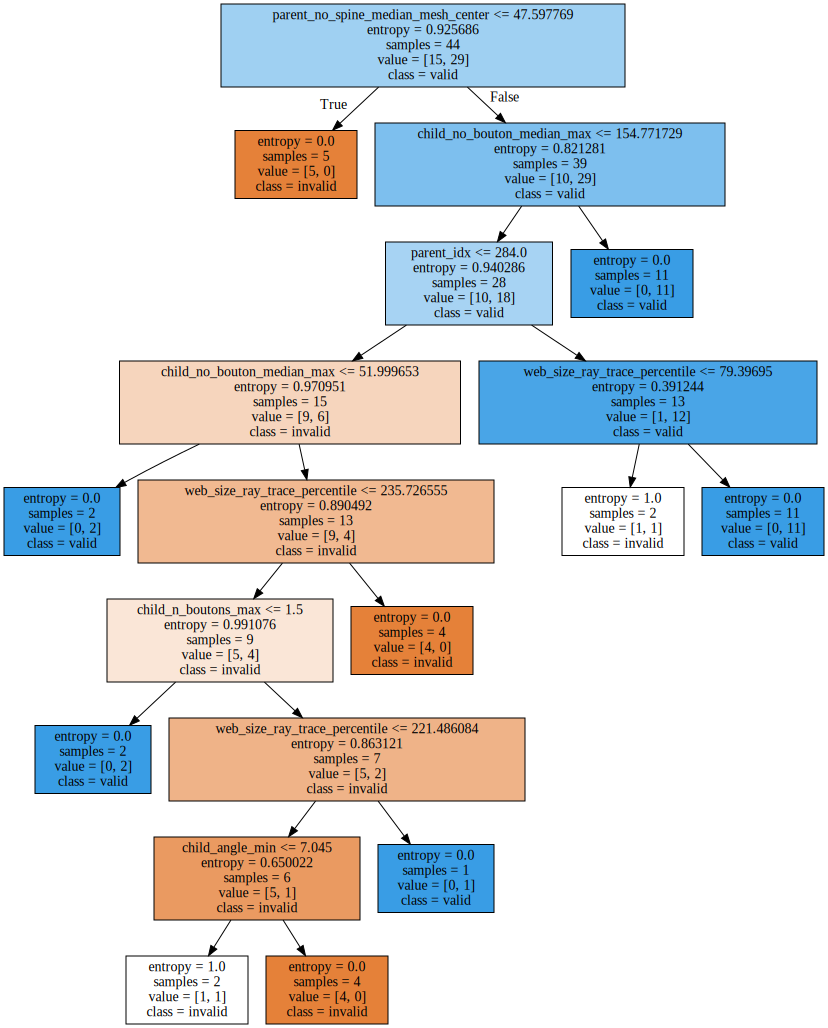

In [39]:
import machine_learning_utils as mlu

df = web_df

target_column = "label"
feature_columns = list(df.columns)
feature_columns.remove(target_column)

clf = mlu.decision_tree_sklearn(df=df,
                          target_column=target_column,
                         feature_columns=None,
                          perform_testing=False,
                          test_size = 0,
                          
                          # parameters for the decision tree
                            criterion = "entropy", # entropy for infromation gain, gini fro gini index
                            splitter = "best", #For the splitt strategy,also can be "random"
                            max_depth = None,
                            max_features = None,
                            min_samples_split= 0.1,
                            min_samples_leaf = 0.02,
                          
                         )
mlu.plot_decision_tree(clf,
                   feature_names=feature_columns,
                  )